**Step 1: Set up the Environment**

In [1]:
# Step 1: Import necessary libraries
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

import warnings
import pandas as pd
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
%matplotlib inline

**Step 2: Define Labels and Image Size**

In [2]:
# Define labels and image size
labels = ["Cucumber Mosaic Virus", "Downy Mildew", "Leaf Spot"]
img_size = 32


**Step 3: Get and Load Data**

In [4]:
# Function to get data
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1]  # convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Load data
data_dir = get_data("/content/drive/MyDrive/Luffa Aegyptiaca 480")


<ipython-input-4-b03562c946ce>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


**Step 4: Display Total Number of Training Images**

In [6]:
# Import necessary library
import glob

# Display total number of training images
image_names = glob.glob(os.path.join('/content/drive/MyDrive/Luffa Aegyptiaca 480', '*', '*'))
print("Total number of training images: ", len(image_names))


Total number of training images:  6533


**Step 5: Create a DataFrame with Filename and ClassId**

In [9]:
# Create a DataFrame with Filename and ClassId
data_df = pd.DataFrame()
data_df['Filename'] = [os.path.basename(img) for img in image_names]
data_df['ClassId'] = [os.path.basename(os.path.dirname(img)) for img in image_names]


**Step 6: Display Sample Images**

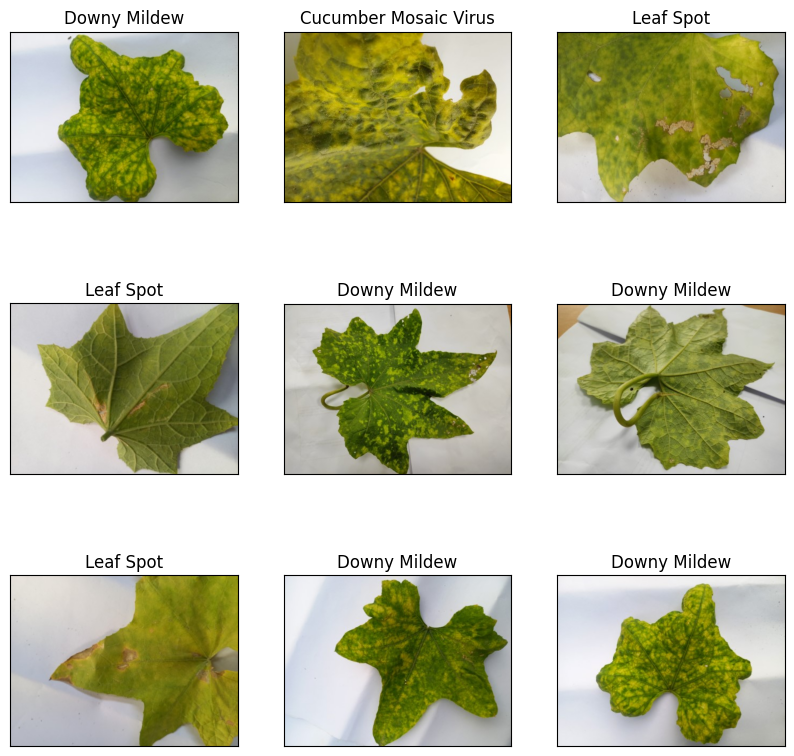

In [10]:
# Display sample images
plot_df = data_df.sample(min(9, len(data_df))).reset_index()
plt.figure(figsize=(10, 10))
for i in range(9):
    img_name = plot_df.loc[i, 'Filename']
    label_str = (plot_df.loc[i, 'ClassId'])
    plt.subplot(3, 3, i+1)
    plt.imshow(plt.imread(os.path.join('/content/drive/MyDrive/Luffa Aegyptiaca 480', label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])


**Step 7: Display Class Distribution**

<BarContainer object of 3 artists>

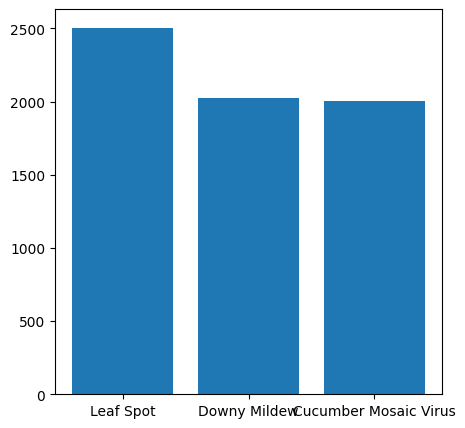

In [11]:
# Display class distribution
class_id_distribution = data_df['ClassId'].value_counts()
plt.figure(figsize=(5,5))
plt.xticks(np.arange(43))
plt.bar(class_id_distribution.index, class_id_distribution.values)


**Step 8: Preprocess and Split Data**

In [12]:
# Preprocess and split data
X = []
Y = []
for feature, label in data_dir:
    X.append(feature)
    Y.append(label)
X = np.array(X) / 255
X.reshape(-1, img_size, img_size, 3)
Y = np.array(Y)

# Split data with stratified sampling
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.10, stratify=Y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.18, random_state=8)

# Display shapes of train, validation, and test sets
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape} - y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")


x_train shape: (4820, 64, 64, 3) - y_train shape: (4820,)
x_val shape: (1059, 64, 64, 3) - y_val shape: (1059,)
x_test shape: (654, 64, 64, 3) - y_test shape: (654,)


In [ ]:
# Step 12: Set up model parameters
num_classes_cnn = 3
input_shape_cnn = (64, 64, 3)
learning_rate_cnn = 0.001
weight_decay_cnn = 0.0001
batch_size_cnn = 128
num_epochs_cnn = 250


**Step 9: Data Augmentation**

In [13]:
# Step 13: Data augmentation
data_augmentation_cnn = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(img_size_cnn, img_size_cnn),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation_cnn",
)
data_augmentation_cnn.layers[0].adapt(x_train_cnn)

**Step 10: Define CNN Model**

In [14]:
# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(labels), activation='softmax')
])


**Step 11: Compile the Model**

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

**Step 12: Train the Model with Data Augmentation**

In [16]:
# Train the model with data augmentation
batch_size = 128
epochs = 250
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val))


Epoch 1/50
150/150 [==============================] - 55s 347ms/step - loss: 0.7655 - accuracy: 0.6496 - val_loss: 0.5730 - val_accuracy: 0.7677
Epoch 2/50
150/150 [==============================] - 42s 280ms/step - loss: 0.4160 - accuracy: 0.8249 - val_loss: 0.4368 - val_accuracy: 0.8215
Epoch 3/50
150/150 [==============================] - 41s 275ms/step - loss: 0.2952 - accuracy: 0.8813 - val_loss: 1.4587 - val_accuracy: 0.6251
Epoch 4/50
150/150 [==============================] - 44s 290ms/step - loss: 0.2684 - accuracy: 0.8880 - val_loss: 0.7997 - val_accuracy: 0.7809
Epoch 5/50
150/150 [==============================] - 40s 267ms/step - loss: 0.2313 - accuracy: 0.9081 - val_loss: 0.2660 - val_accuracy: 0.8848
Epoch 6/50
150/150 [==============================] - 44s 293ms/step - loss: 0.1811 - accuracy: 0.9263 - val_loss: 0.8206 - val_accuracy: 0.8026
Epoch 7/50
150/150 [==============================] - 41s 270ms/step - loss: 0.1555 - accuracy: 0.9396 - val_loss: 0.2859 - val_ac

**Step 13: Evaluate the Model on the Test Set**

In [17]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


21/21 - 1s - loss: 0.0785 - accuracy: 0.9847 - 1s/epoch - 48ms/step
Test accuracy: 0.9847095012664795


**Step 14: Plot Training and Validation Metrics**

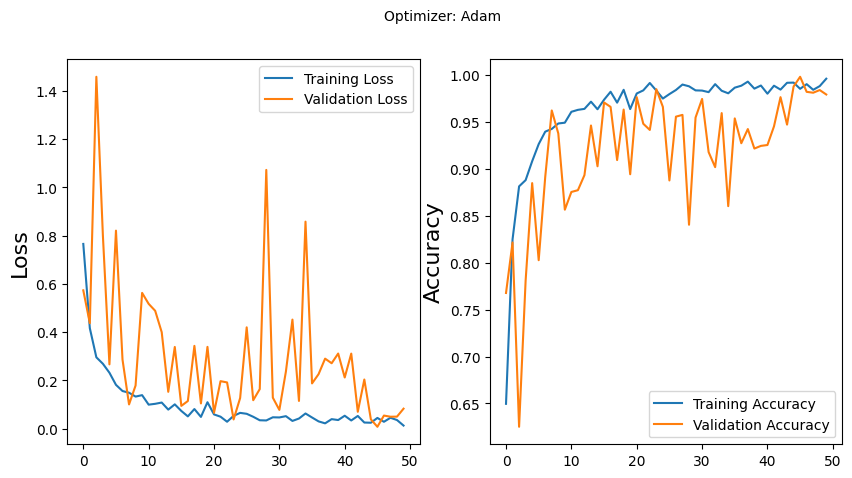

In [18]:
# Plot training and validation metrics
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer: Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


**Step 15: Plot Normalized Confusion Matrix for Test Set**

21/21 [==============================] - 3s 145ms/step


<Figure size 640x480 with 0 Axes>

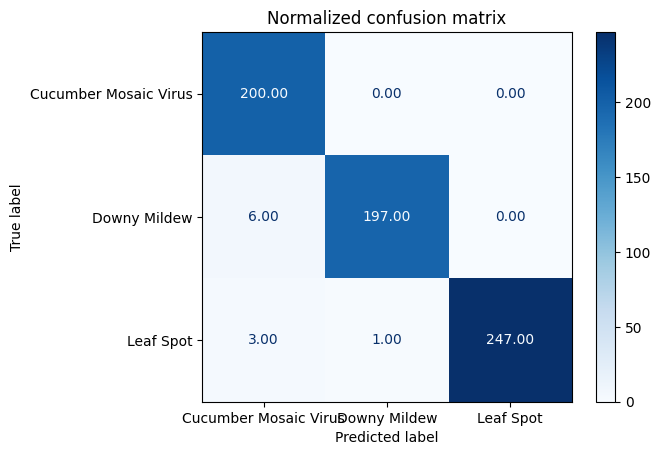

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# ...

# Plot normalized confusion matrix for test set
predictions = model.predict(x_test)
y_pred = [np.argmax(probas) for probas in predictions]

cnf_matrix_test = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
ConfusionMatrixDisplay(cnf_matrix_test, display_labels=labels).plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title('Normalized confusion matrix')
plt.show()


**Step 16: Display Classification Report for Test Set**

In [23]:
# Display classification report for test set
print(classification_report(y_test, y_pred, target_names=labels))


                       precision    recall  f1-score   support

Cucumber Mosaic Virus       0.96      1.00      0.98       200
         Downy Mildew       0.99      0.97      0.98       203
            Leaf Spot       1.00      0.98      0.99       251

             accuracy                           0.98       654
            macro avg       0.98      0.98      0.98       654
         weighted avg       0.99      0.98      0.98       654

